### Project Overview: 
- You are to scrape the web to find every company in the Russell 2000 as of 2020. For mthis data you will calculate the Volatility of each security a well as the Daily Returns. From the Daily Returns calculate the top 20 dips and spikes for the index. 

- Also look for the "Penny stocks" that may show some promise in recent months. 
- If you were to have every stock in the Russell 2000 in a portfolio whick would hold them ost weight after a 10 year span

### Project Approach
- Fetch all companies in Russell 2000
- Use pndas Datareader to get the Adj Close
- Calculate the Daily returns for each security
- Find the top 20 Spikes and Dips for returns 
- Put every security into a portfolio and optimize the portfolio with 10 years back data

### libraries


In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_datareader import data as web

In [5]:
russ = pd.read_excel("resources/Russle_2000_2020.xlsx", index_col='Ticker')

### Data Overview 
- For 2020 we have 1999 conpanies in the Russle 2000

In [7]:
russ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, AAN to ZYXI
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


### Adj Closes
- Will download the Adj Close for each security for 2020 beginning 2020-1-1 to current using pandas Datareader

In [10]:
tickers = list(russ.index)

In [12]:
data = pd.DataFrame()

In [15]:
failed = []
passed = []
for x in tickers:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed.append(x)

### Getting todays Date as a variable 

In [68]:
todays_date = data[-1:].iloc[0].name

### Failed and Passed
- 54 companies failed and 1945 passed

In [137]:
passed = pd.DataFrame(passed, columns=["Tickers"])

In [138]:
passed.to_csv("resources/passed_tickers.csv")

In [16]:
len(failed)

54

In [17]:
len(passed)

1945

### Getting Penny Stocks 
- For penny stocks we will get all companies in the Russell 2000 we will take all stocks under 10 bucks to consideration as of the begining of 2020

In [54]:
penny_Stocks = data[data.apply(lambda x: x < 10)].dropna(axis = 1)

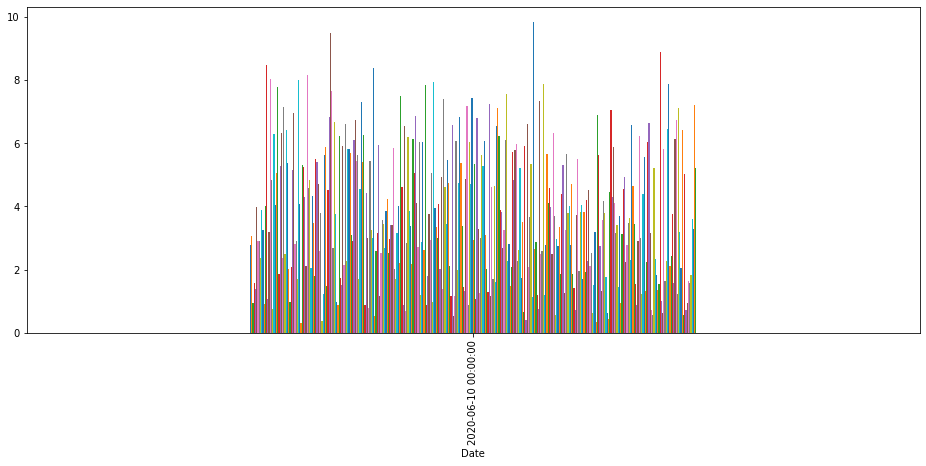

In [63]:
penny_Stocks[-1:].plot(kind = "bar", figsize = (16,6), legend = None)

## Daily Returns for PennyStocks
- We will look at the penny stocks Dips and spikes
- Will check for today's Date

In [70]:
penny_returns = penny_Stocks.pct_change()

In [78]:
top_20_penny_spikes = penny_returns[-1:].transpose().sort_values(todays_date, ascending = False).head(20)

In [88]:
top_20_penny_spikes["Adj Close"] = data[list(top_20_penny_spikes.index)][-1:].transpose().values

In [99]:
top_20_penny_spikes.columns = ["return", "Adj Close"]

In [102]:
top_20_penny_spikes

,return,Adj Close
PTE,0.279279,1.4200
TEUM,0.272857,0.8910
BBCP,0.172131,4.2900
SDRL,0.168704,0.6311
IDEX,0.156863,1.1800
CERS,0.142367,6.6600
PTN,0.124308,0.7308
PLUG,0.109804,5.6600
True,0.100694,3.1700
ECOR,0.094340,1.1600


## Penny Dips 
- Will loook at top 20 penny shares that took the biggest dips

In [93]:
top_20_penny_dips = penny_returns[-1:].transpose().sort_values(todays_date, ascending = True).head(20)

In [103]:
top_20_penny_dips["Adj Close"] = data[list(top_20_penny_dips.index)][-1:].transpose().values

In [105]:
top_20_penny_dips.columns = ["returns", " Adj Close"]

In [107]:
top_20_penny_dips.to_csv("resources/top_20_penny_dips.csv")

In [108]:
top_20_penny_dips

,returns,Adj Close
WLL,-0.331915,1.5700
XELA,-0.304348,0.5600
XOG,-0.301165,0.7198
AHT,-0.296053,1.0700
RNET,-0.276504,2.5250
CHS,-0.276190,1.5200
OAS,-0.229299,1.2100
WATT,-0.226837,2.4200
BGG,-0.218391,2.0400
CTRA,-0.199637,4.4100


### Entire Index DIPS
- We will look at the dips for the entire market

In [110]:
index_returns = data.pct_change()

In [116]:
russ_top_30_dips = index_returns[-1:].transpose().sort_values(todays_date).head(30)

In [126]:
russ_top_30_dips["Adj Close"] = data[list(russ_top_30_dips.index)][-1:].transpose()[todays_date].values

In [128]:
russ_top_30_dips.columns = ["returns", "Adj Close"]

In [129]:
russ_top_30_dips

,returns,Adj Close
HTZ,-0.397129,2.520000
WLL,-0.331915,1.570000
XELA,-0.304348,0.560000
XOG,-0.301165,0.719800
AHT,-0.296053,1.070000
RNET,-0.276504,2.525000
CHS,-0.276190,1.520000
OAS,-0.229299,1.210000
WATT,-0.226837,2.420000
HALL,-0.225688,4.220000


### Russ Spikes

In [130]:
russ_top_30_spikes = index_returns[-1:].transpose().sort_values(todays_date, ascending = False).head(30)

In [131]:
russ_top_30_spikes

Date,2020-06-10
PTE,0.279279
TEUM,0.272857
BE,0.222619
BBCP,0.172131
SDRL,0.168704
IDEX,0.156863
CERS,0.142367
PTN,0.124308
PLUG,0.109804
True,0.100694
